# 1025_Class_Logistic map
## 107022138

## introduction
<font size = 4>
$$
    x_{n+1} = \alpha x_n(1-x_n)
$$<br>
  We will assume $x$ is restricted to the domain $(0,1)$.  
    
</font>

## Tasks: Plot the function and find the attractor
<font size = 4>
Set $\alpha=0.8$ and choose some initial point $x_0$, iterate $f$ and convince yourself that they all are attracted to zero. It might be helpful to plot $x_n$ v.s. $n$.<br>
Plot $f$ and the diagonal $y=x$ on the same plot.<br> Are there any fixed-points other than $x=0$?
Repeat for $\alpha=1.2$, $\alpha=2.8$, $\alpha=3.2$. What happens?
</font>

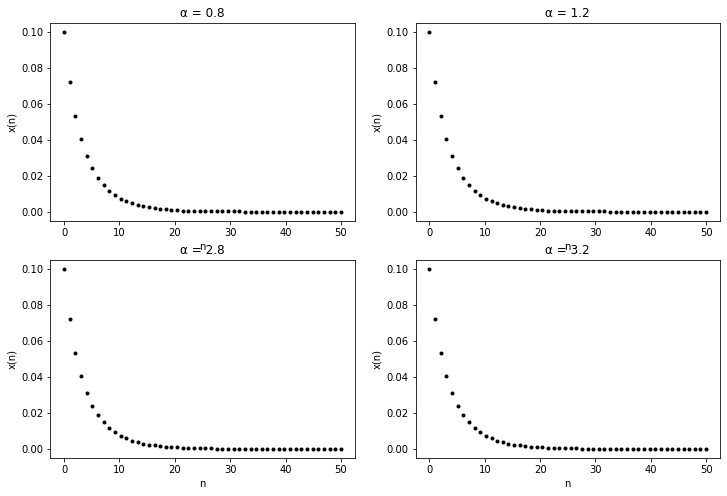

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

N = 50   #步數
x = np.empty(N)
α = [0.8 , 1.2 , 2.8 , 3.2]
x[0] = 0.1
n = np.linspace(0,N,N)
a = np.linspace(0,1)


fig, axes = plt.subplots(ncols = 2, nrows = 2 , figsize = (12,8))
ax = axes.flatten()

for i in range(0,N-1):
    x[i+1] = α[0]*x[i]*(1-x[i])

for i in range(4):
    ax[i].set_title('α = ' + str(α[i]))
    ax[i].plot(n,x,'ko',markersize = 3)
    ax[i].set_xlabel('n')
    ax[i].set_ylabel('x(n)')


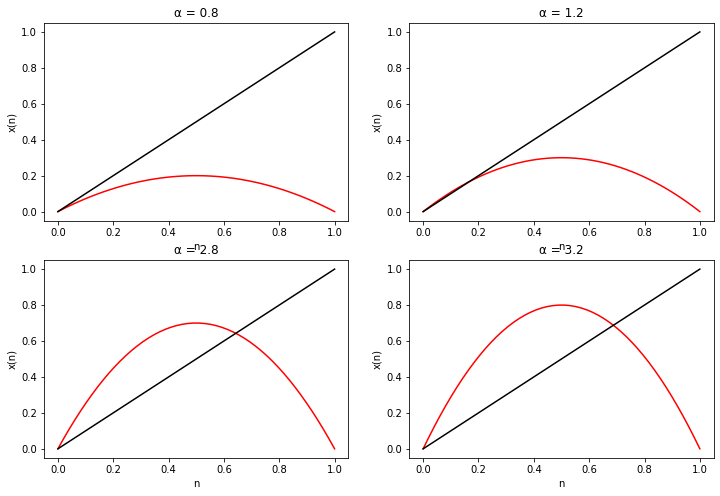

In [2]:
N = 50   #步數
x = np.empty(N)
α = [0.8 , 1.2 , 2.8 , 3.2]
x[0] = 0.1
a = np.linspace(0,1)

fig, axes = plt.subplots(ncols = 2, nrows = 2 , figsize = (12,8))
ax = axes.flatten()

for i in range(0,N-1):
    x[i+1] = α[0]*x[i]*(1-x[i])

for i in range(4):
    b = α[i] * a *(1-a)
    ax[i].set_title('α = ' + str(α[i]))
    ax[i].plot(a,b,'r')
    ax[i].plot(a,a,'k')
    ax[i].set_xlabel('n')
    ax[i].set_ylabel('x(n)')
    

## Tasks: Trajectory of the attractor
<font size = 4>
On the same graph, plot $f$, the diagonal $y=x$, and the trajectory $\{x_0, x_0\}$, $\{x_0, f(x_0)\}$, $\{f(x_0), f(x_0)\}$, $\{f(x_0), f(fx_0)\}$, $\dots$ for $\alpha=2.8, 3.2, 3.52, 3.54, 4.00$. Describe their differences.
</font>

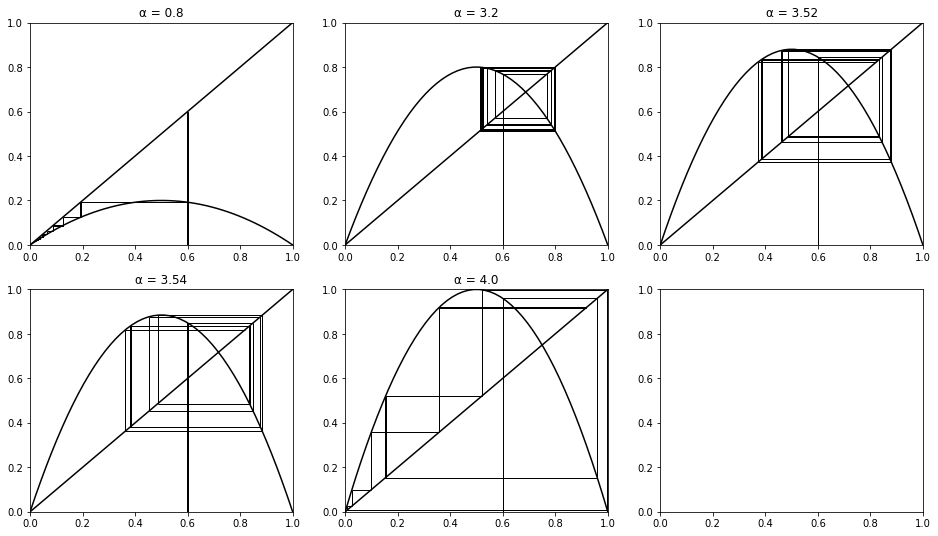

In [3]:
N = 10    #步數
x = np.empty(N)
α = [0.8,3.2,3.52,3.54,4.00]
x[0] = 0.6
a = np.linspace(0,1)

fig, axes = plt.subplots(ncols = 3, nrows = 2 , figsize = (16,9))
ax = axes.flatten()

for ii in range(5):
    b = α[ii] * a *(1-a)
    ax[ii].plot(a,b,'k')
    ax[ii].plot(a,a,'k')
    ax[ii].set_title('α = ' + str(α[ii]))

    for i in range(0,N-1):
        x[i+1] = α[ii]*x[i]*(1-x[i])
        ax[ii].arrow(x[i],x[i],0,x[i+1]-x[i],width = 0.001,head_width = 0.0,length_includes_head = True,color ='k')
        ax[ii].arrow(x[i],x[i+1],x[i+1]-x[i],0,width = 0.001,head_width = 0.0,length_includes_head = True,color ='k')
        
        ax[ii].set_ylim([0,1])
        ax[ii].set_xlim([0,1])
        
        ax[ii].arrow(x[0],0,0,x[1],width = 0.001,head_width = 0.0,length_includes_head = True,color ='k')

# plt.arrow(x[0],0,0,x[1],width = 0.001,head_width = 0.0,length_includes_head = True,color ='k')


## Tasks: Bifucation diagram
<font size = 4>
Plot the attractor as a function of $\alpha$ for $0 <\alpha <4$.
</font>

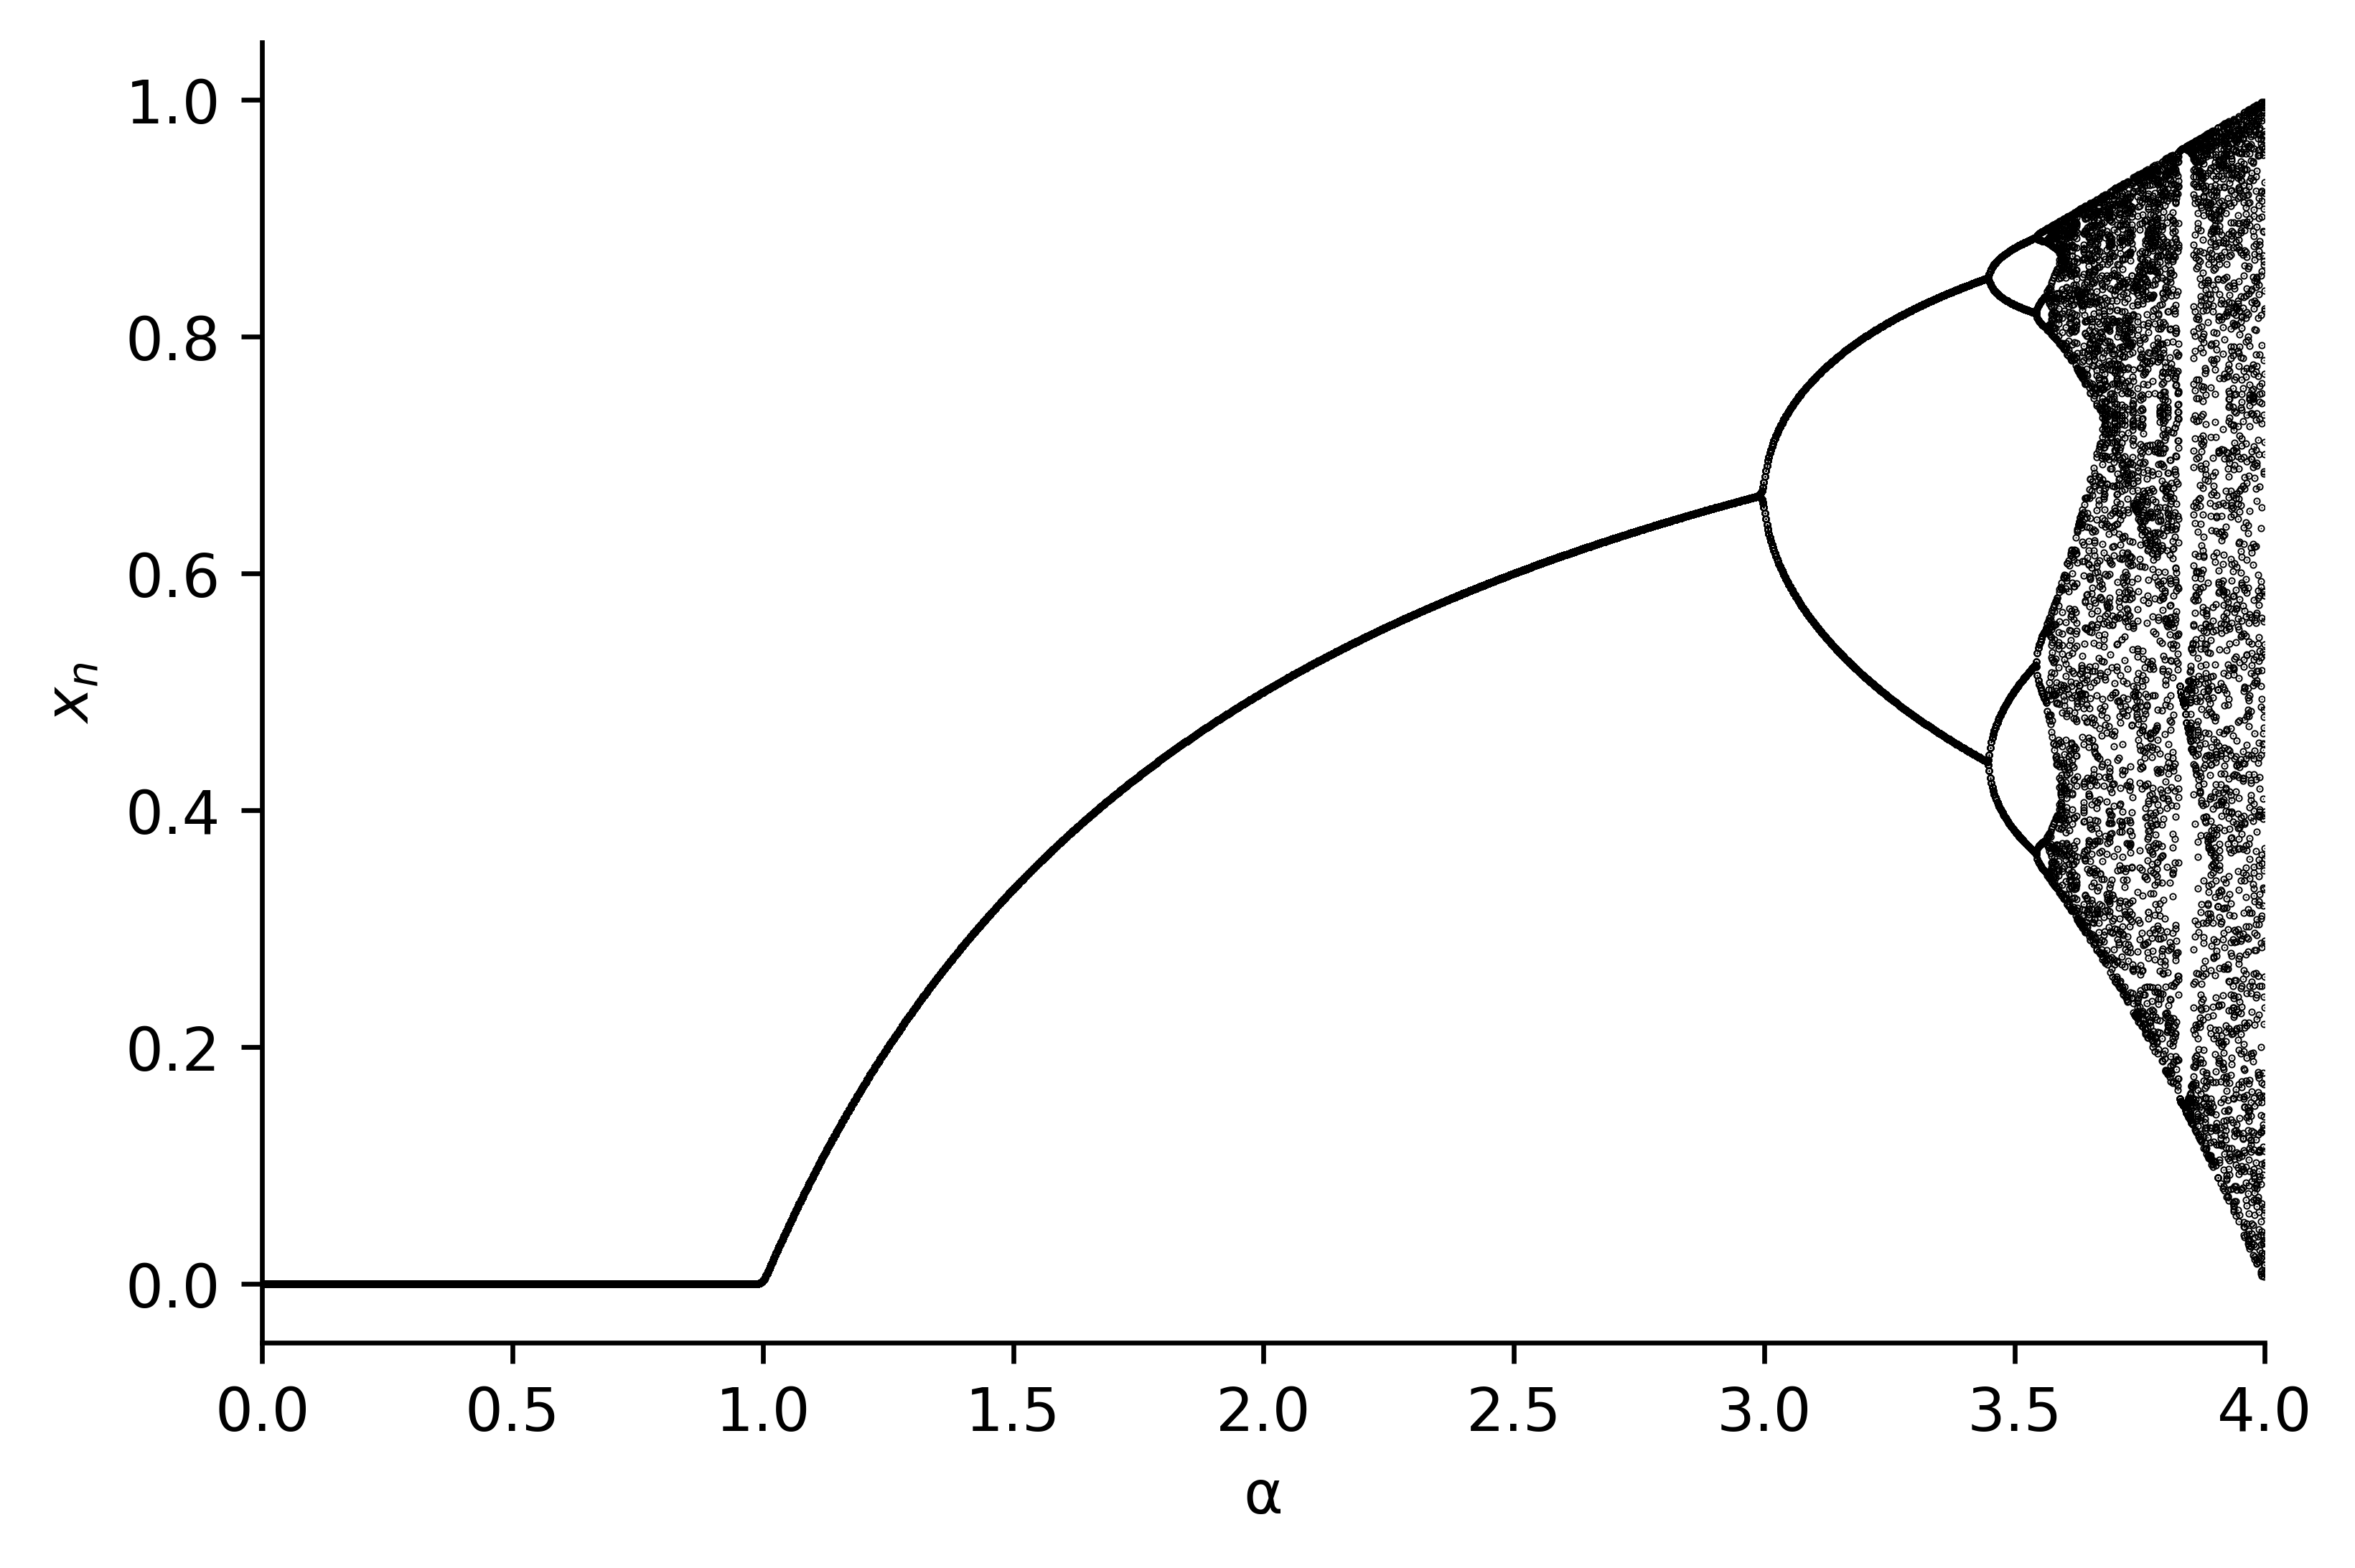

In [4]:
N = 400  # N-N2 is step number before starting plot
N1 = 2000  # N1 is the number of equal diversion point
N2 = 30  # N2 is plot points
x = np.zeros(N)
α = np.linspace(0,4,N1)
αp = np.zeros(N2*N1)

plt.figure(dpi = 600)
ax = plt.axes()

for k in range(N2*N1):
    αp[k] = α[int(k/N2)]
        
for i in range(0,N1):
    x[0] = 0.6
    for j in range(0,N-1):
        x[j+1] = α[i]*x[j]*(1-x[j])
    plt.plot(αp[N2*i:N2*(i+1)],x[-N2:N],'k.',markersize = 0.45)
plt.xlim([0,4.0])
plt.xlabel('α')
plt.ylabel(r'$x_n$')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


## Tasks: three cycle
<font size = 4 >
Consider the case when $\alpha=3.82831$ and $x_0=0.51$. Show that a three cycle occurs with the approximate $x$ values 0.16, 0.52, and 0.96 for the first 80 cycles before the behavior apparently turns chaotic. Find for what iteration that next apparently periodic cycle occurs and for how many cycles it stays periodic?
</font>

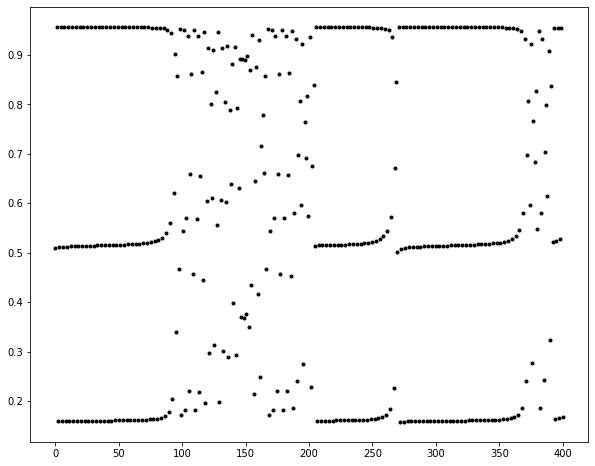

In [5]:
N = 400   #步數
x = np.empty(N)
α = 3.82831
x[0] = 0.51
n = np.linspace(0,N,N)

plt.figure(figsize = (10,8))
# fig, axes = plt.subplots(ncols = 2, nrows = 2 , figsize = (12,8))
# ax = axes.flatten()

for i in range(0,N-1):
    x[i+1] = α*x[i]*(1-x[i])
plt.plot(n,x,'k.')

## Tasks: Feigenbaum number
<font size = 4>
Find $\alpha_n$ where n-th bifurcation occurs.<br>
Calculate$$
\delta_n \equiv \frac{\alpha_n-\alpha_{n-1}}{\alpha_{n+1}-\alpha_n}
$$<br> and plot $\delta_n$ v.s. $n$.
Convince yourself that $\delta_n$ converge to the Feigenbaum number $\delta=4.6692016091029909\dots$.
</font>

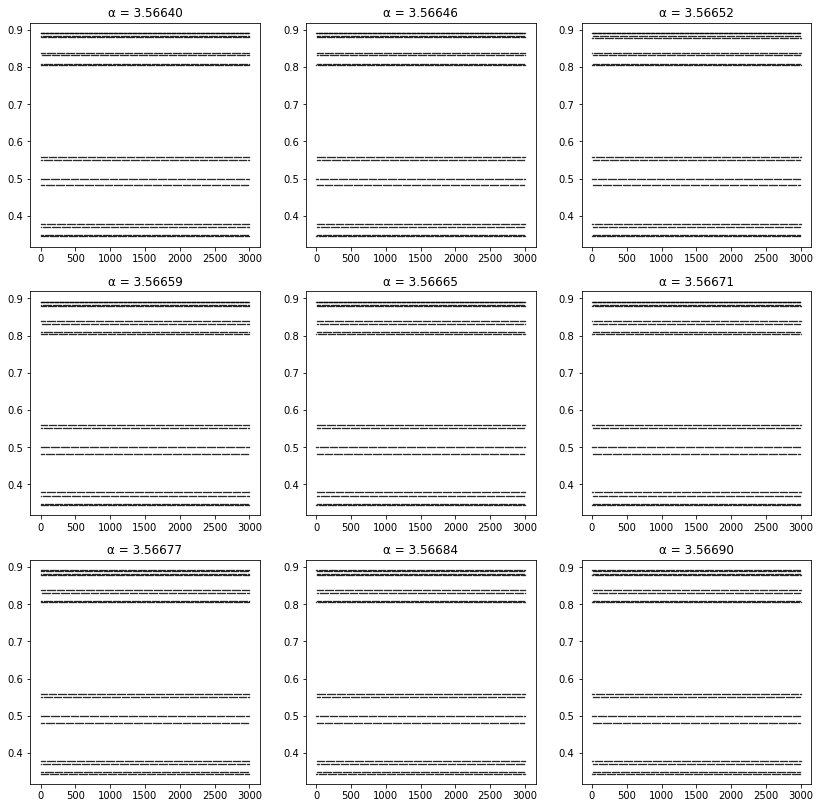

In [6]:
N = 3000   #步數
x = np.empty(N)
α = np.linspace(3.56640, 3.56690,9)
x[0] = 0.5
n = np.linspace(0,N,N)

fig, axes = plt.subplots(ncols = 3, nrows = 3 , figsize = (14,14))
ax = axes.flatten()
for k in range(9):
    for i in range(0,N-1):
        x[i+1] = α[k]*x[i]*(1-x[i])
    ax[k].plot(n,x,'k.',markersize = 0.8)
    ax[k].set_title('α = ' + '%.5f' %α[k])

αn = [3, 3.44969, 3.54435, 3.56492, 3.56652]

<font size = 4>
    Above method is no quite useful, I think. its getting much difficult to distinguish the bifarcation as n getting larger.
    so I use the more intuitive way:
</font>

<IPython.core.display.Javascript object>


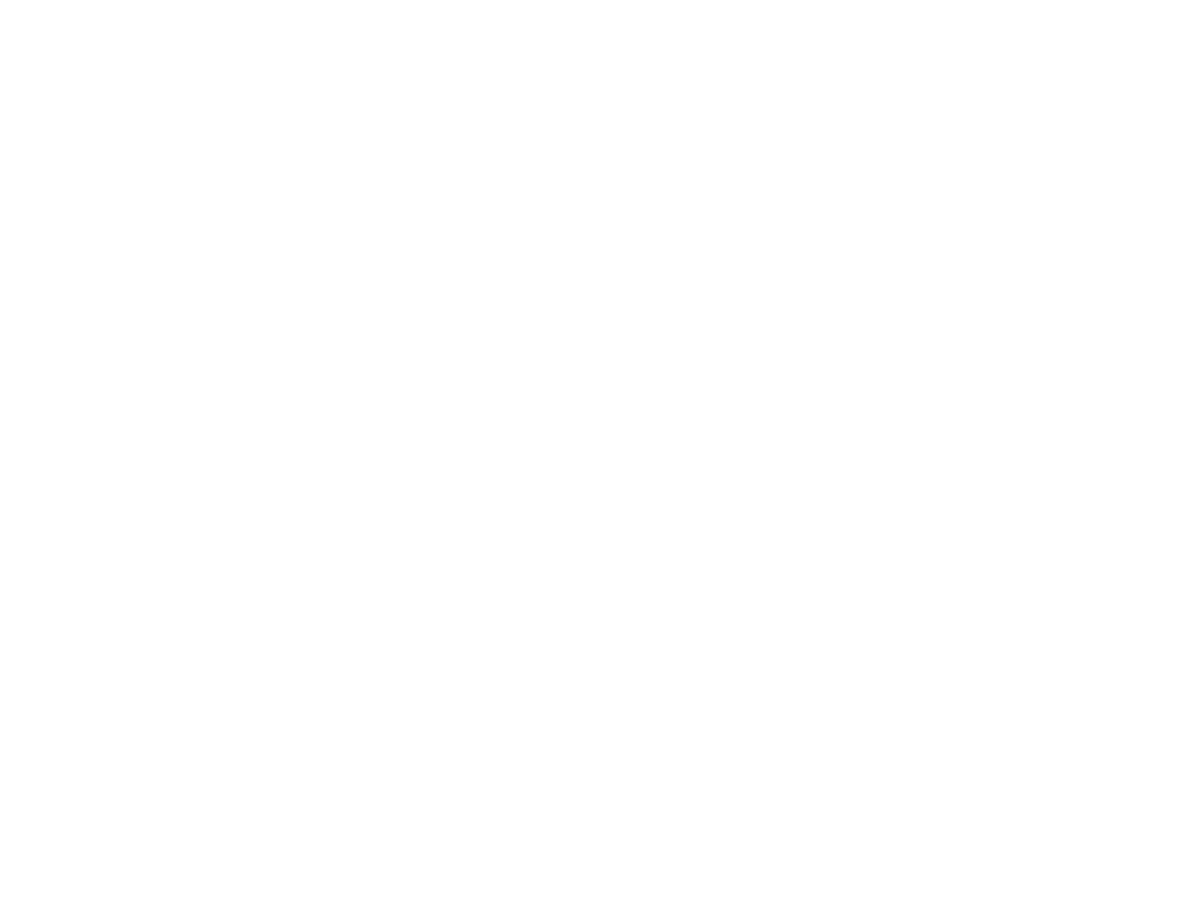

In [7]:
N = 1000  # N-N2 is step number before starting plot
N1 = 1000  # N1 is the number of equal diversion point
N2 = 60  # N2 is plot points
%matplotlib notebook

x = np.zeros(N)
α = np.linspace(2.8,4,N1)
αp = np.zeros(N2*N1)

plt.figure(dpi = 150)
ax = plt.axes()

for k in range(N2*N1):
    αp[k] = α[int(k/N2)]
        
for i in range(0,N1):
    x[0] = 0.6
    for j in range(0,N-1):
        x[j+1] = α[i]*x[j]*(1-x[j])
    plt.plot(αp[N2*i:N2*(i+1)],x[-N2:N],'k,')
plt.xlim([2.8,4.0])
plt.xlabel('α')
plt.ylabel(r'$x_n$')
plt.plot([3,3],[0,1],'k-',lw = 0.05)
plt.plot([3.44965,3.44965],[0,1],'k-',lw = 0.07)
plt.plot([3.54405,3.54405],[0,1],'k-',lw = 0.07)
plt.plot([3.56441,3.56441],[0,1],'k-',lw = 0.07)
plt.plot([3.56873,3.56873],[0,1],'k-',lw = 0.07)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

<font size = 4>
    From the above $α_n$, we can calculat $\delta_n$：

</font>

<IPython.core.display.Javascript object>


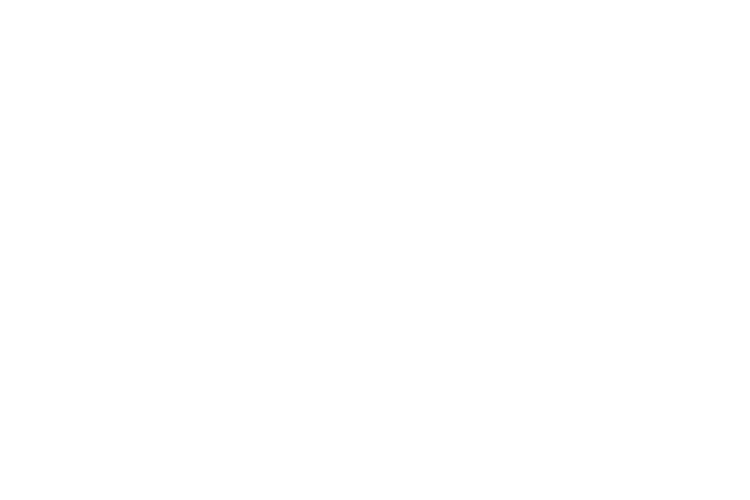

Text(1.5, 4.68, 'δ = 4.6692016')

In [8]:
plt.figure(figsize = (6,4))
αn = [3, 3.44965, 3.54405,3.56441, 3.56873]
δ = np.zeros(5)

for i in range(1,4):
    δ[i] = (αn[i]-αn[i-1])/(αn[i+1]-αn[i])
    plt.plot(i,δ[i],'ko')
plt.plot([1,3],[4.6692016,4.6692016],'k:')
plt.text(1.5,4.68,'δ = 4.6692016')

## Stable, superstable, Lyapunov exponents
<font size = 4>
For a fixed $\alpha$, define $f^2(x)=f(f(x))$, $f^3=f(f(f(x)))$ etc.

If $x^*$ is a fixed-point (so $f(x^*)=x^*$) then the fixed-point is

> unstable if $ \left| f^\prime(x^*) \right| >1 $. <br>
> stable if $ 0 < \left| f^\prime(x^*) \right| < 1 $.<br>
> superstable if $ \left| f^\prime(x^*) \right| =0 $. <br>

If $x^*$ is a period-$2^n$ fixed-point (so $f^{2^n}(x^*)=x^*$). It is $2^n$-cycle superstable if $\frac{df^N(x^*)}{dx}=0$.

Since $f^\prime(1/2)=0$, by the chain rule $ \frac{df^N}{dx} = f^\prime(x_0) f^\prime(x_1) f^\prime(x_2) \dots f^\prime(x_{N-1})$. one has $\frac{df^N(1/2)}{dx}=0$.

So if $x=1/2$ is a period-$2^n$ fixed-point for some $\alpha$, then $x=1/2$ is $2^n$-cycle superstable for this $\alpha$.


## Tasks: Superstable
<font size = 4>
Find the value of $\alpha_n$ at which the $2^n$-cycle is superstable for the first few values of $n$ as follows: Define <br> <br>
$$
G(\alpha) = f^{2^n}(\alpha, 1/2). 
$$<br>
and find the root as a function of $\alpha$. You can use scipy.optimize.brentq to find the roots of a function
Calculate <br><br>
$$
\delta_n \equiv \frac{\alpha_n-\alpha_{n-1}}{\alpha_{n+1}-\alpha_n}
$$<br>
and plot $\delta_n$ v.s. $n$.
Convince yourself that $\delta_n$ also converge to the Feigenbaum number $\delta=4.6692016091029909\dots$.

<IPython.core.display.Javascript object>


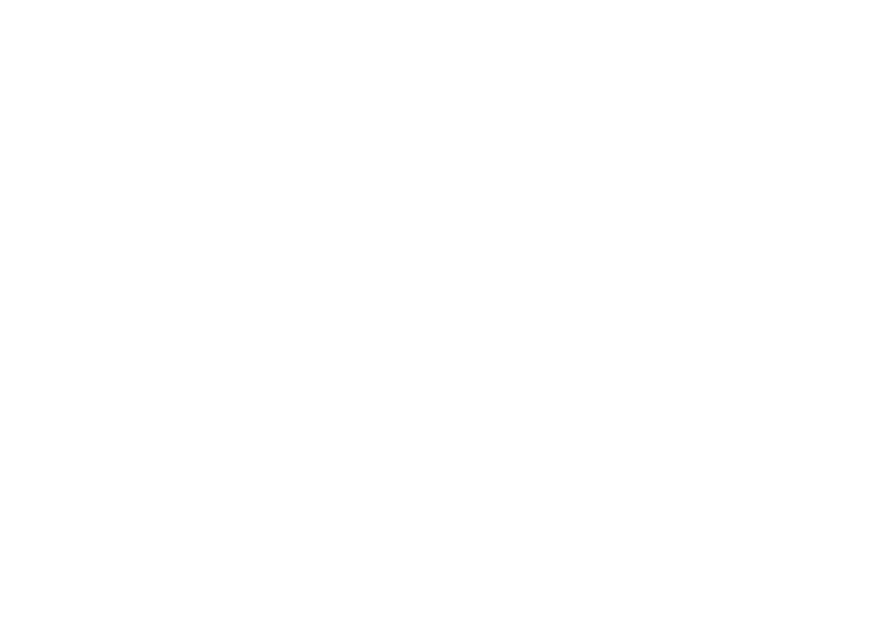

2.0000000000000004
3.236067977499791
3.4985616993276847
3.554640862768823
3.6621925036861604
3.8007709438746766
3.8705409843637524
3.8994689509706024
3.9120466210751275
3.930472995732144
3.9442134957330053
3.973724255674981


In [9]:
from scipy import optimize
plt.figure(figsize = (7,5))
α = np.linspace(1,4,300)

def g(α,x):
    return (α*x*(1-x))
def G(α,n):
    x0 = 0.5
    for i in range(n):
        x0 = g(α,x0)
    return(x0-0.5)

def G2(α):
    return(G(α,2))

def G4(α):
    return(G(α,4))

def G8(α):
    return(G(α,8))

def G16(α):
    return(G(α,16))

# plt.plot(α,G16(α),'k',label = 'n=4')
plt.plot(α,G8(α),'b',label = 'n=3')
plt.plot(α,G4(α),'g',label = 'n=2')
plt.plot(α,G2(α),'r',label = 'n=1')
plt.plot([1,4],[0,0],'k:')

for i in range(len(α)-1):
    if (G8(α[i])*G8(α[i+1]) < 0):
        root = optimize.brentq(G8,α[i],α[i+1])
        print(root)
        plt.plot(root,0,'ko',markersize = 3)
        
plt.legend()

## Tasks: Lyapunov exponents
<font size = 4>
The Lyapunov exponents $\lambda$ can be obtained as follows:$$
  \lambda = \lim_{n\rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} ln \left| \frac{df(x_i)}{dx} \right|
  \approx \frac{1}{n_{\max}} \sum_{i=0}^{n_{max}-1} ln \left| \frac{df(x_i)}{dx} \right|,
$$where $n_{max}$ is some large positive integer.

Plot the Lyapunov exponent as a function of $\alpha$ for the logictic map. Note that

When $\lambda=0$ the bifurcation occurs. <br>
When $\lambda=-\infty$ it is superstable. <br>
When $\lambda >0$ it is chaotic.<br>
Does your plot of the Lyapunov exponent agrees with other calculations above?
</font>

<IPython.core.display.Javascript object>


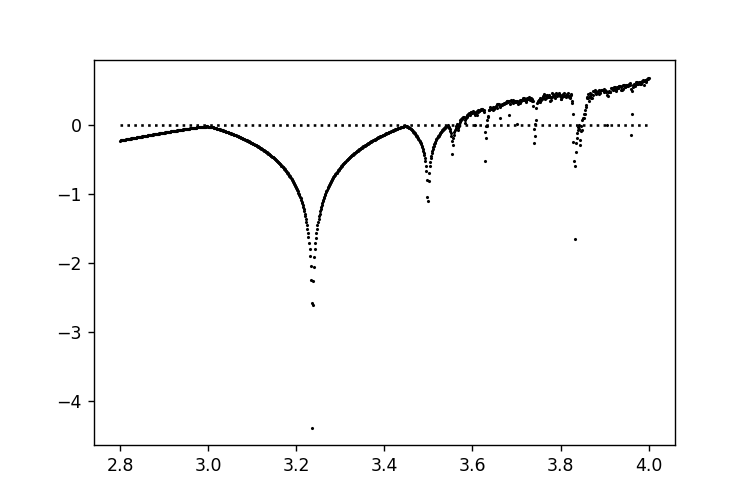

In [10]:
from scipy import optimize
import sympy as sp
%matplotlib notebook

plt.figure(figsize = (6,4))
left = 2.8
right = 4
α = np.linspace(left,right,1000)
N = 300

def g(α,x):
    return (α*x*(1-x))
def dg(α,x):
    return (α*(1-2*x))

for k in range(len(α)):
    diff = 0
    x = 0.51
    for i in range(N):
        diff = diff + np.log(np.abs(dg(α[k],x)))
        x = g(α[k],x)
    diff = diff/N 
    plt.plot(α[k],diff,'ko',markersize = 0.8)
plt.plot([left,right],[0,0],'k:')

## Tasks: Another map
<font size = 4>
Plot the attractor for the map$$
f(x) = B\sin(\pi x)
$$<br>
    for $0<B<1$.
Do the bifurcation diagram appear similar? <br>
For this map find the superstable $\alpha_n$ and the ratio $\delta_n$. <br>
Does $\delta_n$ also converge to the Feigenbaum number $\delta=4.6692016091029909\dots$?

<IPython.core.display.Javascript object>


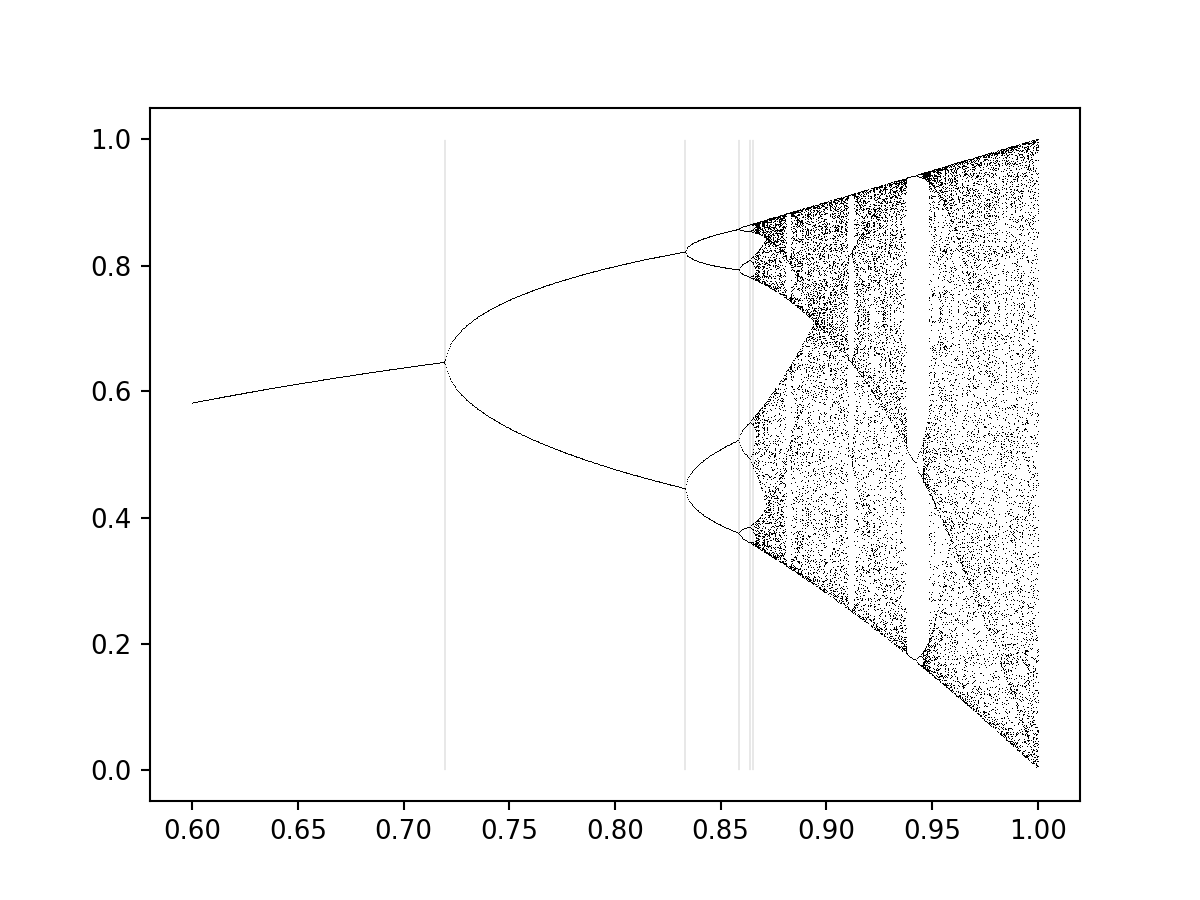

In [11]:
N = 1000  # N-N2 is step number before starting plot
N1 = 1000  # N1 is the number of equal diversion point
N2 = 70  # N2 is plot points
x = np.zeros(N)
B = np.linspace(0.6,1,N1)
Bp = np.zeros(N2*N1)

plt.figure(dpi = 150)
ax = plt.axes()

for k in range(N2*N1):
    Bp[k] = B[int(k/N2)]
        
for i in range(0,N1):
    x[0] = 0.6
    for j in range(0,N-1):
        x[j+1] = B[i]*np.sin((np.pi*x[j]))
    plt.plot(Bp[N2*i:N2*(i+1)],x[-N2:N],'k,')
    
plt.plot([0.719726,0.719726],[0,1],'k-',lw = 0.07)
plt.plot([0.833119,0.833119],[0,1],'k-',lw = 0.07)
plt.plot([0.858579,0.858579],[0,1],'k-',lw = 0.07)
plt.plot([0.864053,0.864053],[0,1],'k-',lw = 0.07)
plt.plot([0.865232,0.865232],[0,1],'k-',lw = 0.07)

<IPython.core.display.Javascript object>


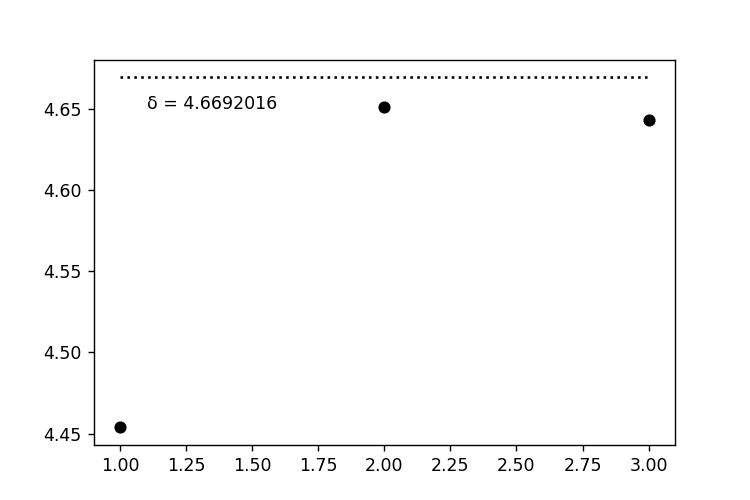

Text(1.1, 4.65, 'δ = 4.6692016')

In [12]:
plt.figure(figsize = (6,4))
αn = [0.719726, 0.833119, 0.858579,0.864053, 0.865232]
δ = np.zeros(5)

for i in range(1,4):
    δ[i] = (αn[i]-αn[i-1])/(αn[i+1]-αn[i])
    plt.plot(i,δ[i],'ko')
plt.plot([1,3],[4.6692016,4.6692016],'k:')
plt.text(1.1,4.65,'δ = 4.6692016')